In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [2]:
images = [
    {'cm': 30.5*2, 'img': cv2.imread('circ=105cm/2ft.jpg')},
    {'cm': 30.5*3, 'img': cv2.imread('circ=105cm/3ft.jpg')},
    {'cm': 30.5*4, 'img': cv2.imread('circ=105cm/4ft.jpg')},
    {'cm': 30.5*5, 'img': cv2.imread('circ=105cm/5ft.jpg')},
]

In [22]:
CONTOUR_MIN_AREA = 1000
def process(img):
    debug = img.copy()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    thresh = cv2.bitwise_or(cv2.inRange(hsv, (0, 150, 100), (20, 255, 255)),
                            cv2.inRange(hsv, (160, 150, 100), (180, 255, 255)))
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered = [c for c in contours if cv2.contourArea(c) > CONTOUR_MIN_AREA]
    if len(filtered) > 0:
        contour = max(filtered, key=lambda c: cv2.contourArea(c))
        rect = cv2.fitEllipse(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        cv2.drawContours(debug, [contour, box], -1, (255,0,255), 3)
    return debug

((536.9881591796875, 258.18304443359375), (427.4949035644531, 494.85479736328125), 171.4102783203125)
((523.1061401367188, 246.06532287597656), (248.98040771484375, 301.07427978515625), 172.61471557617188)
((487.97833251953125, 226.81344604492188), (190.65817260742188, 230.14263916015625), 172.07464599609375)
((489.4834899902344, 187.03419494628906), (150.36851501464844, 182.3196563720703), 172.02012634277344)


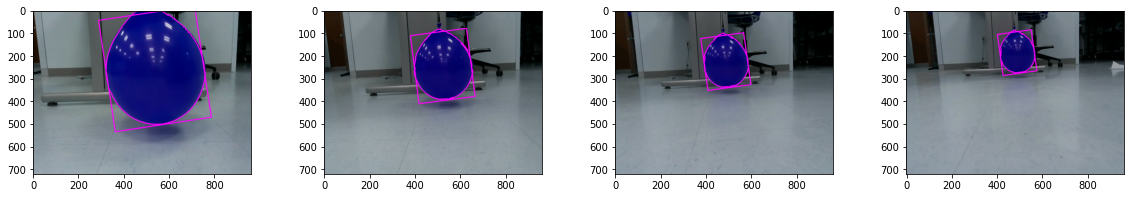

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.imshow(process(images[0]['img']))
ax2.imshow(process(images[1]['img']))
ax3.imshow(process(images[2]['img']))
ax4.imshow(process(images[3]['img']))

In [17]:
circ = 105.0
dia = 105/np.pi
dia

33.42253804929802

In [24]:
CONTOUR_MIN_AREA = 1000
def process(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    thresh = cv2.bitwise_or(cv2.inRange(hsv, (0, 150, 100), (20, 255, 255)),
                            cv2.inRange(hsv, (160, 150, 100), (180, 255, 255)))
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered = [c for c in contours if cv2.contourArea(c) > CONTOUR_MIN_AREA]
    if len(filtered) > 0:
        contour = max(filtered, key=lambda c: cv2.contourArea(c))
        rect = cv2.fitEllipse(contour)
        center, size, angle = rect
        return min(size)

In [26]:
for row in images:
    print(process(row['img']))

427.4949035644531
248.98040771484375
190.65817260742188
150.36851501464844


In [27]:
import vision

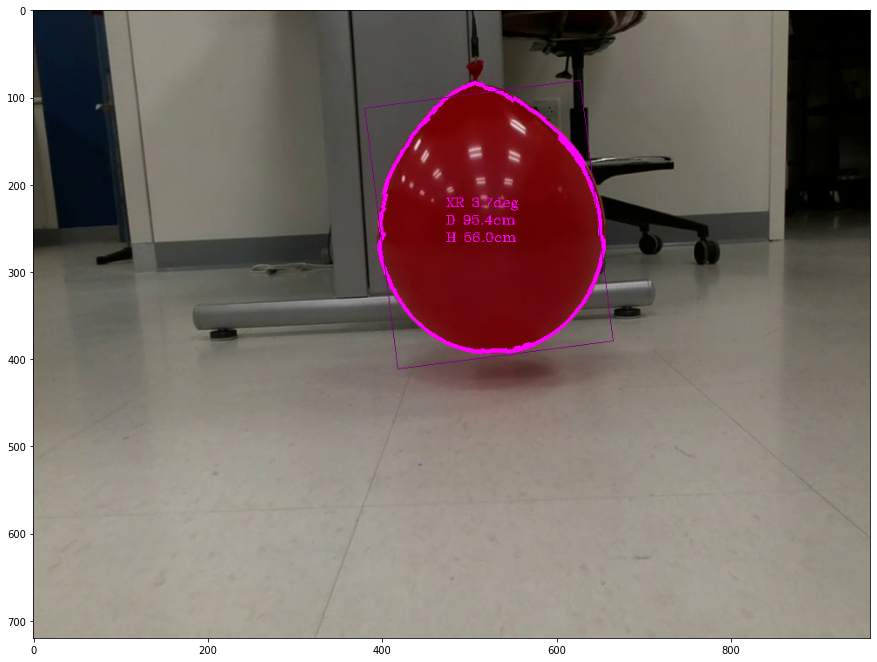

In [33]:
img = images[1]['img']
display = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
threshR = cv2.bitwise_or(
        cv2.inRange(hsv, (0, 150, 100), (20, 255, 255)),
        cv2.inRange(hsv, (160, 150, 100), (180, 255, 255)))
tracked = vision.track_balloon(threshR, display)
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))